In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("C:\\Users\\arifa\\Downloads\\Fraud.csv")
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [3]:
df.shape

(6362620, 11)

# 1.Data cleaning including missing values, outliers and multi-collinearity.

### data cleaning

In [4]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
print(df["nameOrig"].astype("category"))

0          C1231006815
1          C1666544295
2          C1305486145
3           C840083671
4          C2048537720
              ...     
6362615     C786484425
6362616    C1529008245
6362617    C1162922333
6362618    C1685995037
6362619    C1280323807
Name: nameOrig, Length: 6362620, dtype: category
Categories (6353307, object): ['C1000000639', 'C1000001337', 'C1000001725', 'C1000002591', ..., 'C999998175', 'C999999254', 'C999999614', 'C999999784']


In [6]:

print(df["nameDest"].astype("category"))

0          M1979787155
1          M2044282225
2           C553264065
3            C38997010
4          M1230701703
              ...     
6362615     C776919290
6362616    C1881841831
6362617    C1365125890
6362618    C2080388513
6362619     C873221189
Name: nameDest, Length: 6362620, dtype: category
Categories (2722362, object): ['C1000004082', 'C1000004940', 'C1000013769', 'C100001587', ..., 'M99999900', 'M999999089', 'M999999543', 'M999999784']


In [7]:
print(df["type"].astype("category"))

0           PAYMENT
1           PAYMENT
2          TRANSFER
3          CASH_OUT
4           PAYMENT
             ...   
6362615    CASH_OUT
6362616    TRANSFER
6362617    CASH_OUT
6362618    TRANSFER
6362619    CASH_OUT
Name: type, Length: 6362620, dtype: category
Categories (5, object): ['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']


##### We just take type as a indepent value
##### We'll ignore nameDest, nameOrig from the dataset
##### it is the classification model instead of regression model(linear model) therefore I'll not apply multicollinearity on the model

#  2.Describe your fraud detection model in elaboration.

##### we'll use the logistic regression because it is best for claasification model(having output in form of 0,1)

# 3. How did you select variables to be included in the model?

##### we'll use feature selection to select the independent variables in model
##### Firstly we'll convert type(string data col) to hot encode(int)

In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Type'] = labelencoder.fit_transform(df['type'])

X= df[["step","Type","amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]]

#print(X.head())
# Select last column of dataframe as a series
y = df["isFraud"]

In [10]:
X.columns

Index(['step', 'Type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest'],
      dtype='object')

In [11]:
X.head()

,step,Type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9839.64,170136.0,160296.36,0.0,0.0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0
3,1,1,181.00,181.0,0.00,21182.0,0.0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0


#  4. Demonstrate the performance of the model by using best set of tools. 

[0.14262965 0.03119884 0.19870709 0.2839827  0.07864324 0.06298209
 0.20185639]


<AxesSubplot:>

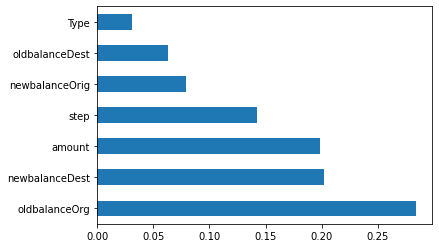

In [12]:

from sklearn.ensemble import ExtraTreesClassifier
model= ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
features_importance=pd.Series(model.feature_importances_,index=X.columns)
features_importance.nlargest(10).plot(kind="barh")

##### we'll use those features  "oldbalanceOrg","newbalanceDest","amount","step","oldbalanceDest","newbalanceOrig"  because its has highest  dependency on output variable

###### As well as we'll ignore those features transfer, CASH_OUT, CASH_IN, payment  beacuse it is less dependent on output vaariable

# 5.What are the key factors that predict fraudulent customer?

###### isFraud is the specific dataset having fraudulent behavior of the agents -> output/ dependent feature
###### other features (that we select during feature selection) used as a-> input/independent features


### applying model on dataset and then test and train them

In [13]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Type
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06,1.714150e+00
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03,1.350117e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00,1.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00,3.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00,4.000000e+00


In [14]:
#X=df[["oldbalanceOrg","newbalanceDest","amount","step","oldbalanceDest","newbalanceOrig","CASH_IN","CASH_out","PAYMENT"]]
#y = df["isFraud"]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.30,random_state=41)

In [16]:
from sklearn.linear_model import LogisticRegression

logistic_reg= LogisticRegression()
logistic_reg.fit(X_train,y_train)

LogisticRegression()

In [17]:
from sklearn import metrics
y_predict= logistic_reg.predict(X_test)
metrics.accuracy_score(y_test,y_predict)

0.9983256373422689

In [18]:
logistic_reg.score(X_test,y_test)

0.9983256373422689

In [20]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [26]:
ridge= Ridge()
params= {'alpha':[1e-15,1e-20,1e-30,1e-50]}
ridge_regression= GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=10)
ridge_regression.fit(X,y)


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-20, 1e-30, 1e-50]},
             scoring='neg_mean_squared_error')

In [27]:
ridge_regression= GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=10)
ridge_regression.fit(X,y)
print("best alpha value",ridge_regression.best_params_)
print("best score ",ridge_regression.best_score_)

best alpha value {'alpha': 1e-15}
best score  -0.0011361644315792472


In [28]:
ridge_regression.fit(X_train,y_train)
print("best alpha value",ridge_regression.best_params_)
print("best score ",ridge_regression.best_score_)

best alpha value {'alpha': 1e-15}
best score  -0.0010775813369399787


In [29]:
from sklearn.metrics import r2_score
y_pred= ridge_regression.predict(X_test)
r2score1= r2_score(y_pred,y_test)
print(r2score1)


-4.136716446398203


In [ ]:
y_pred= lasso_regression.predict(X_test)
r2score1= r2_score(y_pred,y_test)
print(r2score1)

# 6. Do these factors make sense? If yes, How? If not, How not?  

###### yes these factors makes a sence because as we apply the model we get good score rating 

# 7. What kind of prevention should be adopted while company update its infrastructure?


###### we'll 

# 8. Assuming these actions have been implemented, how would you determine if they work?